### Syntatic Parsing

- Syntactic parsing refers to a technique by which **tokenized, segmented and part-of-speech segmented text** is assigned a structure revealing the relationship between tokens
- done as the **first step** in **deep information extraction** and semantic understanding of a text.
- usually suffer from structural ambiguity : which means that we could have **more than one correct parse trees** for one sentence. This may present a challenge to selecting the most likely parse for the sentence. 


**Chunking**

- Shallow parsing, also known as chunking, is a type of (NLP) technique that aims to identify and extract meaningflul phrases or chunks from a sentence. 
- shallow parsing focuses on identifying **individual phrases** or **constituents**, such as noun phrases, verb phrases, and prepositional phrases. 
- **constituents** are then linked to the higher order units with discrete grammatical meanings such as noun groups, verb groups, etc. 

- text --> groups(Noun Phrases)
- group of words that you create from chunking is known as chunks





[('John', 'NNP'), ('found', 'VBD'), ('a', 'DT'), ('new', 'JJ'), ('coach', 'NN'), ('and', 'CC'), ('a', 'DT'), ('new', 'JJ'), ('bed', 'NN'), ('in', 'IN'), ('his', 'PRP$'), ('new', 'JJ'), ('apartment', 'NN')]


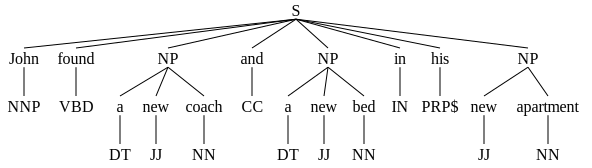

In [1]:
import nltk
from textblob import TextBlob

my_string = "John found a new coach and a new bed in his new apartment."

opt = TextBlob(my_string)

print(opt.tags)

#We are looking for zero or one determiner, 
#followed by one or more adjectives followed by a noun
reg_exp = "NP:{<DT>?<JJ>*<NN>}"

rp = nltk.chunk.RegexpParser(reg_exp)
output = rp.parse(opt.tags)
output

**Chinking**

- After breaking down our text to chunks, we need to remove unwanted words from our chunks, In such a case, chinking is used.
- Chinking is simply a process that you use to remove a chunk from a chunk
- we denoted the chunks using `{}`. To denote the chinks, we use `}{` in the regular expression part.
- If the sequence of tokens appears in the middle of the chunk, these tokens are removed, leaving two chunks where there was only one before. 
  


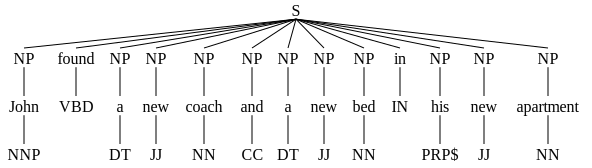

In [2]:
reg_exp = r"""
NP: 
{<.*>} # chunking 
}<VBD|IN>+{ # chinking
"""

rp = nltk.chunk.RegexpParser(reg_exp)

output = rp.parse(opt.tags)

output

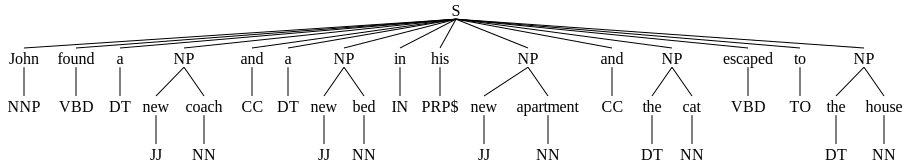

In [3]:
my_string = "John found a new coach and a new bed in his new apartment and the cat escaped to the house"
opt = TextBlob(my_string)

reg_exp = r""" 
NP: 
{(<JJ>{1,2}<NN>{1,2})|(<DT>{1,2}<NN>{1,2})} # chunking 
}<VBD|IN>+{ # chinking
"""
rp = nltk.chunk.RegexpParser(reg_exp)
output = rp.parse(opt.tags)
output

### PDFs

In [4]:
import PyPDF2


In [5]:
# Reading a PDF and printing it's pages 
pdf_bin = open("sample.pdf", "rb")

# read the object 
pdf_reader_obj = PyPDF2.PdfReader(pdf_bin)

# print pages 
print(f"total pages : {len(pdf_reader_obj.pages)}")

text = ""

# extract text from the pdf 
for page in range(len(pdf_reader_obj.pages)):
    
    page_object = pdf_reader_obj.pages[page]
    
    page_text = page_object.extract_text()
    
    text += page_text
    

pdf_bin.close()
    

total pages : 5


In [6]:
### Writing the extracted text to a new PDF 

page_one = pdf_reader_obj.pages[0]

# init the writer
writer = PyPDF2.PdfWriter()

# add page to the writer 
writer.add_page(page_one) ## Add Page ## 

# read a dummy pdf 
pdf_out_bin = open("out.pdf","wb")

writer.write(pdf_out_bin)

pdf_out_bin.close()

ValueError: seek of closed file

In [ ]:
def merge_pdf(pdfs):
    
    merger = PyPDF2.PdfMerger()
    
    for pdf in pdfs:        
        merger.append(pdf) # append 
        
    bin_out = open("merger.pdf",'wb')
    merger.write(bin_out)
    bin_out.close()
    
merge_pdf(["out.pdf", "sample.pdf"])

**Word Embedding**

Word Embedding: representation of words as dense vectors in a continuous vector space, where the similarity between words is captured by the proximity of their respective vectors.

- large corpora of text using unsupervised learning with techniques such as neural networks
- Word embeddings capture the semantic and syntactic meaning of words based on the context in which they appear in the training data


We could represent words as single integers, like "hello" = 1, "world" = 2, "cat" = 3, and so on. However, this approach has two major issues:

1. Neural Network: Numerically Close == Semantically Close (Which is alwasys not the case!)

2. Even if we managed to group similar words with close numbers, it would only capture similarity in one dimension. For instance, "man" and "boy" can be similar in gender but different in age or profession, which a single number can't fully represent.


**Interpretation if Cos between embeddings:** 

Closer to 1: The sentences are likely to be very similar in meaning. <br>
Around 0: The sentences are likely to be unrelated or neutral with respect to each other.<br>
Closer to -1: The sentences might be expressing opposite meanings or concepts.



| **Feature**              | **Word2Vec**                                    | **BERT**                                           |
|--------------------------|-------------------------------------------------|----------------------------------------------------|
| **Type**                 | Shallow, continuous bag-of-words (CBOW) or skip-gram model | Deep, bidirectional transformer-based model         |
| **Context**              | Fixed-size window of words (limited context)    | Entire sentence or sequence (global context)        |
| **Word Representation**  | Static word embeddings (single vector per word) | Contextualized word embeddings (different vectors depending on context) |
| **Pre-training Objective** | Predicting surrounding words (CBOW) or the target word (Skip-gram) | Masked Language Model (MLM) and Next Sentence Prediction (NSP) |
| **Architecture**         | Simple neural network with one hidden layer     | Multi-layer transformer (deep neural network)       |
| **Handling Polysemy**    | Same vector for all senses of a word            | Different vectors based on the word's context       |
| **Training Data**        | Typically trained on large corpora like Google News | Trained on large corpora like BooksCorpus and Wikipedia |
| **Training Time**        | Relatively fast to train                        | Computationally expensive and time-consuming        |
| **Performance**          | Good for basic similarity tasks                 | Superior for a wide range of NLP tasks (e.g., question answering, sentiment analysis) |
| **Usage**                | Suitable for tasks like word similarity, sentiment analysis, etc. | State-of-the-art performance on various NLP benchmarks |
| **Handling OOV Words**    | Can’t handle out-of-vocabulary (OOV) words well | Can handle OOV words using subword tokenization (WordPiece) |


| **Feature**                | **BERT**                                             | **ELMo**                                                | **GPT**                                               |
|----------------------------|------------------------------------------------------|---------------------------------------------------------|-------------------------------------------------------|
| **Full Name**              | Bidirectional Encoder Representations from Transformers | Embeddings from Language Models                          | Generative Pre-trained Transformer                    |
| **Architecture**           | Transformer-based, bidirectional                     | BiLSTM (Bidirectional Long Short-Term Memory)            | Transformer-based, unidirectional (left-to-right)     |
| **Contextual Representation** | Contextualized, bidirectional                      | Contextualized, bidirectional                            | Contextualized, unidirectional (left-to-right)        |
| **Pre-training Objectives** | - Masked Language Model (MLM) <br> - Next Sentence Prediction (NSP) | - Deep contextualized word representations <br> - Pretrained on `character-based language model` | - Language Modeling (predicting next word in sequence) |
| **Training Data**          | BooksCorpus and English Wikipedia                    | 1 Billion Word Benchmark                                 | BooksCorpus (for GPT) / Diverse web text (for GPT-2)  |
| **Word Embeddings**        | Contextual, changes depending on sentence            | Contextual, changes depending on sentence                | Contextual, changes depending on sentence              |
| **Handling Polysemy**      | Effectively handles polysemy by creating different embeddings based on context | Effectively handles polysemy by creating different embeddings based on context | Effectively handles polysemy, but only in left-to-right context |
| **Pre-training Method**    | Transformer-based with self-attention                | BiLSTM with character-level convolutions                 | Transformer-based with self-attention (autoregressive) |
| **Fine-tuning**            | Yes, designed for fine-tuning on specific tasks      | Can be fine-tuned but typically used as a `feature extractor` | Yes, designed for fine-tuning on specific tasks       |
| **Use Cases**              | State-of-the-art performance in many NLP tasks (e.g., QA, sentiment analysis) | Used as a feature extractor for various NLP tasks        | Strong performance in text generation and completion tasks |
| **Context Window**         | Considers entire sentence context bidirectionally    | Considers entire sentence context bidirectionally        | Considers left-to-right context only                   |
| **Training Complexity**    | High, requires substantial computational resources   | Moderate, but computationally less demanding than BERT   | High, similar to BERT, especially in later versions like GPT-2 |
| **Performance**            | Generally superior in tasks requiring deep understanding of context | Effective in a variety of NLP tasks, but not as powerful as BERT or GPT in some cases | Strong in text generation, completion, and certain understanding tasks |




### Word2vec

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize


sentece = "I love Natrual Language Processing and I will score 90/100."

tokens = word_tokenize(sentece)

model = Word2Vec([tokens], vector_size = 100, window =5, min_count =1, sg = 0)

print("Vocab:\n")
print(list(model.wv.index_to_key))

print("Word Vectors:")
for word in model.wv.index_to_key:
    vector = model.wv[word]
    # print(f"Word: {word} Vector: {vector}")

In [ ]:
# get the vector for a word 
word = "Apple"

if word in model.wv.index_to_key:
    vec = model.wv[word]
else:
    vec = 0
    
vec

In [ ]:
# find the similar 
word = "love"
similarites = model.wv.most_similar(word, topn = 2)

for w , sim in similarites:
    print(w, sim)

In [ ]:
# save and load 
model.save("x.model")
model = Word2Vec.load("x.model")

### BERT

In [ ]:
import random 
import torch 
from transformers import BertTokenizer, BertModel 
from sklearn.metrics.pairwise import cosine_similarity

seed = 42 
random.seed(seed)
torch.manual_seed(seed)

if torch.cuda.is_available(): 
    torch.cuda.manual_seed_all(seed)
    
    
    
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")
    

In [ ]:
text = "The AIMT is a fantastic program at the lambton college."


# 
# tokenizer (text , retun_tensor, padd..) -> {"input_ids":,"attention_mask"}
# tokenizer.tokenize() # break to wordpiece 'subword': running -> run ##ing
# tokenizer.decode(skip_special_tokens=True) : input_ids -> text
# tokenizer.encode : text -> tokens

encoding = tokenizer(text, return_tensors='pt', padding= True, truncation=False, max_length=64)
input_ids = encoding["input_ids"]
attention_mask = encoding["attention_mask"]


with torch.no_grad():

    outputs = model(input_ids, attention_mask=attention_mask)
    word_embedding = outputs.last_hidden_state
    sentence_embedding = outputs.last_hidden_state.mean(dim=1)
    
    
print(f"Shape of word embeddings: {word_embedding.shape}")

print(cosine_similarity(sentence_embedding,sentence_embedding))

In [ ]:
decoded_text = tokenizer.decode(input_ids[0], skip_special_tokens=True)

# the decoded text 
print(f"Decoded Text : {decoded_text}")

tokenized_text = tokenizer.tokenize(decoded_text)

print(f"tokenized text {tokenized_text}")

encoded_text = tokenizer.encode(text, return_tensors="pt")
print(encoded_text)